<a href="https://colab.research.google.com/github/jejae3372/Data_science/blob/main/Data_Science_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1번

한글깨짐 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,640 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dire

In [ ]:
import pandas as pd
import numpy as np

get_seoul = pd.read_csv('/content/gts-seoul.csv')
get_seoul.shape
get_seoul_array = np.array(get_seoul)
sum = 0

for i in range(32085):
    if get_seoul_array[i][2] == '2011-03-21 06:00':
          for j in [3, 5, 7, 10, 11]:
            sum += get_seoul_array[i][j]
print(sum)


1038.9


2번

In [ ]:
get_seoul_1 = get_seoul[['습도','풍속', '현지기압', '기온', '이슬점 온도']]

get_seoul_nan = get_seoul_1.dropna(how='any') #nan 포함 행 지우기
get_seoul_array = np.array(get_seoul_nan) #(32068, 5)
rows = get_seoul_array.shape[0]
avg = get_seoul_nan.mean(axis = 'rows')
avg_hum = avg[0] #평균 습도 = 59.021620
max_wind = get_seoul_nan['풍속'].max() #최대풍속 19
min_temp= get_seoul_nan['기온'].min() #최저기온 -17.6
sum = rows + avg_hum + max_wind + min_temp
print(sum)

32128.421619683173


3번

[[ 1.         -0.20800276 -0.09701857  0.17605649  0.57212268]
 [-0.20800276  1.         -0.03811411  0.01084699 -0.08680174]
 [-0.09701857 -0.03811411  1.         -0.20405187 -0.20970152]
 [ 0.17605649  0.01084699 -0.20405187  1.          0.90358279]
 [ 0.57212268 -0.08680174 -0.20970152  0.90358279  1.        ]]
1.1792022126818202
(32027,)
(5, 5)
0.6187252015474853


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


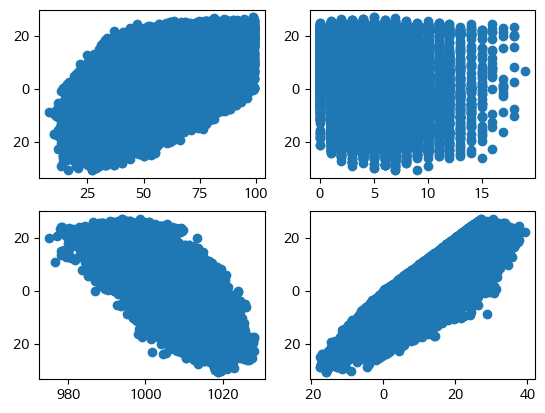

In [ ]:
#3-1. 상관계수 구하기

get_corr = get_seoul_nan.corr(method='pearson')
get_corr_mat = np.array(get_corr)
sum = 0
print(get_corr_mat)

for i in range(4):
  sum += get_corr_mat[4][i]
print(sum)  #1.179202

#3-2. 산점도(Scatter plot)그리기
#get_seoul_nan.columns = 열의 이름들을 가져옴

x_name = get_seoul_nan.columns.tolist()
x_name_1 = x_name[0:4]  #이슬점 온도 인덱스 잘라냄

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumBarunGothic'
k = 221
for i in (x_name_1):
  x = get_seoul_nan[i].tolist()
  y = get_seoul_nan['이슬점 온도'].tolist()
  #plt.subplot(k)
  #plt.scatter(x, y)

  k += 1

#현지기압의 이상치 제거

seoul_pre = get_seoul_nan[get_seoul_nan.현지기압 > 200]
print(seoul_pre['현지기압'].shape) # 32027
k = 221
for i in (x_name_1):
  x = seoul_pre[i].tolist()
  y = seoul_pre['이슬점 온도'].tolist()

  plt.subplot(k)
  plt.scatter(x, y)
  k += 1

#전처리 후 상관계수

get_corr_re = seoul_pre.corr(method='pearson')
get_corr_mat_re = np.array(get_corr_re)
print(get_corr_mat_re.shape)

sum_1 = 0
for i in range(4):
  sum_1 += get_corr_mat_re[4][i]
print(sum_1)#0.6187252

In [ ]:
#이슬점 온도 계산 공식

from sklearn.linear_model import LinearRegression
seoul_pre_drop = seoul_pre.drop(['이슬점 온도'], axis = 1)

x = seoul_pre_drop
y = seoul_pre['이슬점 온도'].tolist()

lr = LinearRegression()
lr.fit(x, y)
y_pred = list(lr.predict(x))
print(lr.coef_)
print(lr.intercept_)
n = len(x)
sum1 = 0
for i in range(len(y)):
  sum1 += (y[i] - y_pred[i])**2

mse = (1/n) * sum1
print(mse)
#1.168514629572595

[ 0.2676329  -0.03078923  0.00952646  0.92936961]
-32.91662937401224
1.168514629572595
